## DataCo Supply Chain Analysis

* [Introduction](#chapter0)
* [Shipping Modes Performance](#chapter1)
* [Engaging with Potential Clients](#chapter4)
* [Supply Chain Performance by Shipping Modes](#chapter11)
* [Shipping Days and Delivery Date Variance](#chapter2)
* [Delivery Date Variance in terms of Product Categories and Days of the week](#chapter3)
* [Summary](#chapter5)




## Introduction <a class="anchor"  id="chapter0"></a>

This is a brief supply chain analysis on the company DataCo Global. The dataset of Supply Chains used by the company DataCo Global is borrowed from [SHASHWAT](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?select=DescriptionDataCoSupplyChain.csv) to analyze the shipping modes performance. 

Shipping Modes (Days for shipment scheduled):
1. Standard Class (4 Days)
2. Second Class (2 Days)
3. First Class (1 Day)
4. Same Day (0 Day)

It is assumed that the fee is higher for a shipping mode with a shorter days for shiped scheduled.

In this project, the shipping modes performance is analyzed. It is found that customers prefer a shipping mode with lowest fee. Also, some of the shipping modes have serious problem in the supply chain, which lead to numbers of delay and longer delay time. However, due to the shortage of the dataset, it is not applicable to determine the actual root cause and solutions for that issue. 

An **insight** is given to the sales team as the order number reflects that **Fan Shop, Apparel, and Golf** product customers **are more tend to** do use this supply chain service. Also, they **are more willing to** use different **shipping modes (Same Day, First Class service)**, which results in **higher shipping fee**.

Please enjoy this project!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supply = pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [3]:
supply.columns = [col.lower().replace(' ', '_') for col in supply.columns]
supply.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
supply.drop(columns=["customer_email", "customer_fname", "customer_lname", "customer_password", "latitude", "longitude", "product_description", "product_image"], inplace=True)
supply["shipping_date_dateorders"] = pd.to_datetime(supply["shipping_date_dateorders"])
supply["shipping_year"] = supply["shipping_date_dateorders"].dt.year
supply["shipping_day"] = supply["shipping_date_dateorders"].dt.day_name()
supply["shipping_hour"] = supply["shipping_date_dateorders"].dt.hour
supply["late_days"] = supply.days_for_shipping_real - supply.days_for_shipment_scheduled

In [4]:
##Comparing performance between shipping modes
##Same Day: Shipping on Same Day 
##First Class: Shipping within 1 Day 
##Second Class: Shipping within 3 Days 
##Standard Class: Shipping within 6 Days
total = supply.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
total

ship_mode = supply.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))



ship_mode = ship_mode.merge(total, on = "shipping_mode", how = "left")
ship_mode.rename(columns={'count': 'total_number'}, inplace=True)
ship_mode["percentage"] = ship_mode.number/ship_mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = ship_mode[ship_mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

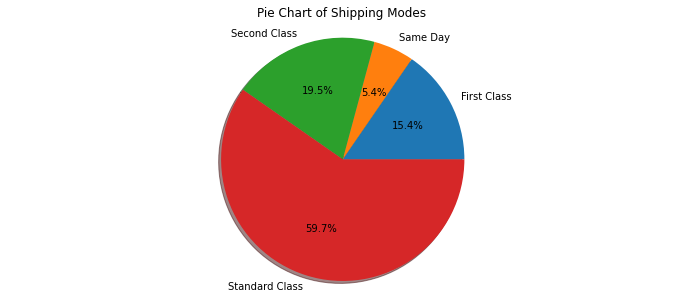

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
x = total["shipping_mode"]
y = total["count"]
ax1.pie(y,labels=x,  autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie Chart of Shipping Modes')
plt.show()

## Shipping Modes Performance <a class="anchor"  id="chapter1"></a>

In this Pie Chart, it is clear that Standard Class is the majority of shipping mode among the others, while Same Day shipping mode only shares a small portion. Also, it is shown that customers tend to use the shipping method with a lower price. 

Summary:

* Customers tend to use the shipping method with a lower price


[Text(0, 0, 'Apparel'),
 Text(1, 0, 'Book Shop'),
 Text(2, 0, 'Discs Shop'),
 Text(3, 0, 'Fan Shop'),
 Text(4, 0, 'Fitness'),
 Text(5, 0, 'Footwear'),
 Text(6, 0, 'Golf'),
 Text(7, 0, 'Health and Beauty '),
 Text(8, 0, 'Outdoors'),
 Text(9, 0, 'Pet Shop'),
 Text(10, 0, 'Technology')]

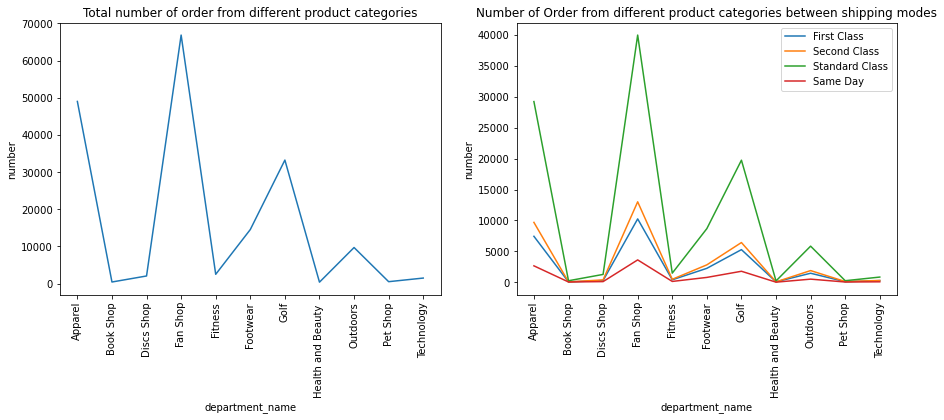

In [6]:
first_class_department = supply[supply["shipping_mode"] == "First Class"]
first_class_department = first_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_department = supply[supply["shipping_mode"] == "Second Class"]
second_class_department = second_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_department = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_department = standard_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_department = supply[supply["shipping_mode"] == "Same Day"]
same_day_department = same_day_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
sns.lineplot(x =department["department_name"], y = department["number"], ax=ax1)
ax1.set_title("Total number of order from different product categories")
ax1.set_xticks(range(len(department["department_name"])))
ax1.set_xticklabels(department["department_name"], rotation=90)

sns.lineplot(x = first_class_department['department_name'], y = first_class_department['number'], label='First Class', ax=ax2)
sns.lineplot(x = second_class_department['department_name'], y = second_class_department['number'], label='Second Class', ax=ax2)
sns.lineplot(x = standard_class_department['department_name'], y = standard_class_department['number'], label='Standard Class', ax=ax2)
sns.lineplot(x = same_day_department['department_name'], y = same_day_department['number'], label='Same Day', ax=ax2)
ax2.set_title("Number of Order from different product categories between shipping modes")
ax2.set_xticks(range(len(department["department_name"])))
ax2.set_xticklabels(department["department_name"], rotation=90)



## Engaging with Potential Clients <a class="anchor"  id="chapter4"></a>

The left-hand side graph shows the total number of orders placed in different product categories.

* **Fan Shop, Apparel, and Golf** products have the **largest number of order** when using our service.

The right-hand side graph shows the number of orders for different shipping modes. It shares simialr pattern with the left-hand side graph.

* **Most orders** perfer using **Standard Class** service
* **Fan Shop, Apparel, and Golf** products have the **largest number of order** in terms of **all shipping modes**.

Advice:
* **Sales Team** can **approach potential clients** from **Fan Shop, Apparel, and Golf industry**.
* Their customers also have **higher chance** to use **premier shipping modes**.

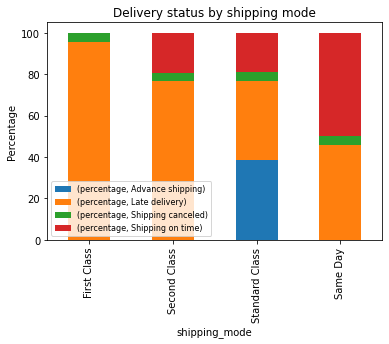

In [7]:
ship_mode_graph.plot(kind='bar', stacked=True)
plt.xlabel('shipping_mode')
plt.ylabel('Percentage')
plt.title('Delivery status by shipping mode')
plt.legend(loc='lower left', prop={'size': 8})

## Supply Chain Performance by Shipping Modes <a class="anchor"  id="chapter11"></a>
As the stacked barchart shown, the **performance of all shipping modes is not so good**. In general, **40% of the orders** are **late** delivery. Almost **95% orders of First Class** shipping mode are **late** delivery. As a result, First Class and Second Class shipping modes require improvements in terms of supply chain to deliver orders on time.

Summary:

* First Class and Second Class shipping modes have serious late delivery problem

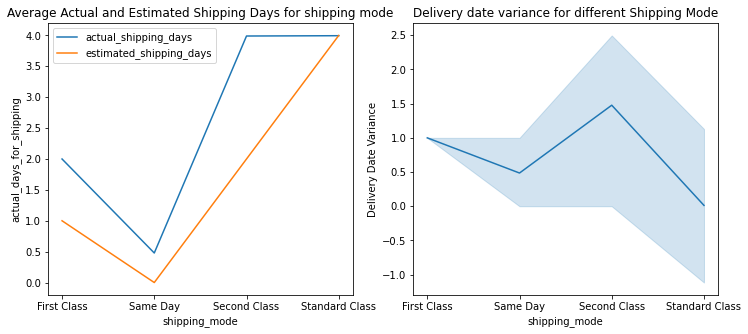

In [8]:
shipping_mode = supply.groupby(["shipping_mode"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x = shipping_mode['shipping_mode'], y = shipping_mode['actual_days_for_shipping'], label='actual_shipping_days', ax=ax1)
sns.lineplot(x = shipping_mode['shipping_mode'], y = shipping_mode['scheduled_days_for_shipping'], label='estimated_shipping_days', ax=ax1)
ax1.set_title("Average Actual and Estimated Shipping Days for shipping mode")
ax1.legend(loc='upper left')

sns.lineplot(x = ship_mode['shipping_mode'], y = ship_mode['late_days'], ax=ax2)
ax2.set_title("Delivery date variance for different Shipping Mode")
ax2.set_ylabel("Delivery Date Variance")
plt.show()

## Shipping Days and Delivery Date Variance <a class="anchor"  id="chapter2"></a>
From the line graph on left-hand side, it is clear that the actual shipping days are larger than the estimated one for First Class, Same Day, and Second Class shipping mode. Only Standard Class can complete the delivery as estimated.

* First Class, Second Class, Same Day takes longer time to be completed as expected.
* Standard Class normally deliver on time.

From the line graph on right-hand side, it is more clear about the delivery date variance. 

**Delivery Date Variance = Actual Shipping Days - Estimated Shipping Days.**

As a result, if the value is greater than 0, it means that delivery takes longer days to be completed than estimated. If it is less than 0, it means the delivery is completed earlier than expected.

In this line graph, the shadows are showing the maximum and minimum delivery date variance, while the line is showing the average value.

* **First Class** is very stable, which is always **one day behind** the schedule. 

* The performance of **Same Day** shipping mode is **not bad** as it has an average 0.5 days longer than expected. 

* **Second Class** has the **most poor performance** as it usually takes 1.5 days longer to complete the delivery, which is the longest among others. Besides, it has the largest maximum delivery date variance, which indicates that it has **the longest delay**. 

* **Standard Class** has the **best performance** as it usually delivers on time. Besides, it sometimes **delivers earlier than expected**.


Text(0, 0.5, 'Delivery Date Variance')

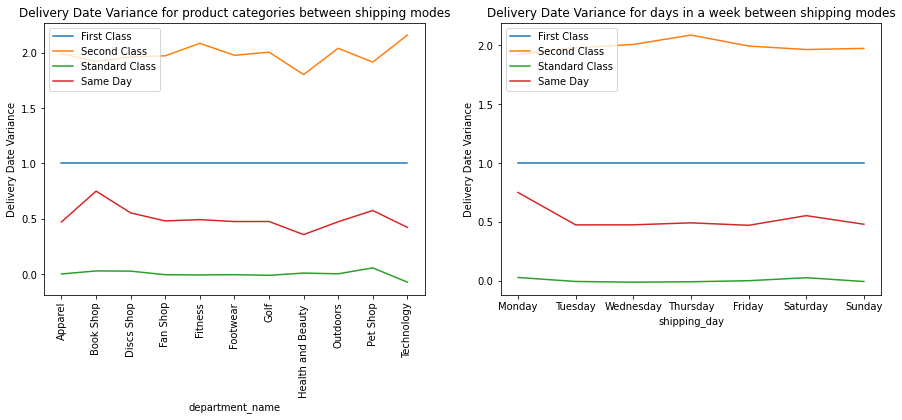

In [9]:
first_class_department = supply[supply["shipping_mode"] == "First Class"]
first_class_department = first_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_department = supply[supply["shipping_mode"] == "Second Class"]
second_class_department = second_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_department = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_department = standard_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_department = supply[supply["shipping_mode"] == "Same Day"]
same_day_department = same_day_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x = first_class_department['department_name'], y = first_class_department['late_days'], label='First Class', ax= ax1)
sns.lineplot(x = second_class_department['department_name'], y = second_class_department['late_days'], label='Second Class', ax= ax1)
sns.lineplot(x = standard_class_department['department_name'], y = standard_class_department['late_days'], label='Standard Class', ax= ax1)
sns.lineplot(x = same_day_department['department_name'], y = same_day_department['late_days'], label='Same Day', ax= ax1)
ax1.set_title("Delivery Date Variance for product categories between shipping modes")
ax1.legend(loc='upper left')
ax1.set_xticks(range(len(department["department_name"])))
ax1.set_xticklabels(department["department_name"], rotation=90)
ax1.set_ylabel("Delivery Date Variance")

first_class_day = supply[supply["shipping_mode"] == "First Class"]
first_class_day = first_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_day = supply[supply["shipping_mode"] == "Second Class"]
second_class_day = second_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_day = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_day = standard_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_day = supply[supply["shipping_mode"] == "Same Day"]
same_day_day = same_day_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
first_class_day['shipping_day'] = pd.Categorical(first_class_day['shipping_day'], categories=day_order, ordered=True)
sns.lineplot(x = first_class_day['shipping_day'], y = first_class_department['late_days'], label='First Class', ax= ax2)
sns.lineplot(x = second_class_day['shipping_day'], y = second_class_department['late_days'], label='Second Class', ax= ax2)
sns.lineplot(x = standard_class_day['shipping_day'], y = standard_class_department['late_days'], label='Standard Class', ax= ax2)
sns.lineplot(x = same_day_day['shipping_day'], y = same_day_department['late_days'], label='Same Day', ax= ax2)
ax2.set_title("Delivery Date Variance for days in a week between shipping modes")
ax2.legend(loc='upper left')
ax2.set_ylabel("Delivery Date Variance")

## Delivery Date Variance in terms of Product Categories and Days of the week <a class="anchor"  id="chapter3"></a>
This 2 line graphs shows the delivery date variance comparing to different categories and days in a week.

Categories:
* **First Class** shows a **very stable** delivery date variance to different categories, meaning that it is not affected by any products and always takes 1 day more to complete delivery than expected.
* Performance of **Second Class** is affected by the categories the most among all shipping modes. **Technology products** usually results in a **longer delay** than other products, when using the Second Class service.
* Performance of **Same Day** is also affected by categories. **Bookshop products** usually **takes longer time** to arrive when comparing to the estimated days.
* **Standard Class** has the **best performance**, which usually has no delay and its performance is **not affected** by different categories of products.

Days of the Week:
* All shipping modes have **similar performance** in days of the week
* Performance of **Same Day** shipping mode is affected the most on **Monday**, which results in delay.
* Performance of **Second Class** is dropped on **Thursday**.

Determine root cause:
* poor performance for Technology and Bookshop products when using Second Class and Same Day service
* poor performance of Same Day and Second Class shipping mode on Monday and Thursday 



## Summary <a class="anchor"  id="chapter5"></a>

**Customers Behaviors**
* **Most orders** perfer using **Standard Class** service
* **Fan Shop, Apparel, and Golf** products have the **largest number of order** in terms of **all shipping modes**

**Supply Chain Performance**
* First Class and Second Class shipping modes have serious late delivery problem
* **First Class** is always **one day behind** the schedule
* **Second Class** usually takes 1.5 days longer to complete the delivery 
* **Second Class** has **the longest delay**

**Advice**
* **Sales Team** can **approach potential clients** from **Fan Shop, Apparel, and Golf industry**
* Their customers also have **higher chance** to use **premier shipping modes**
* Determine the root cause and solutions for supply chain performance